In [120]:
import numpy as np                #importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

# Task 1:  Loading the dataset

In [2]:
dataset=pd.read_csv("hour.csv")  # Loading the dataset

In [3]:
dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Task 2:  Handling the missing values

In [183]:
dataset.isnull() #checking if there is any missing values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [184]:
dataset.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
dtype: bool

# Task 3:   Encoding the categorical Text variables

In [185]:
from sklearn.preprocessing import LabelEncoder

In [186]:
labelencoder_a=LabelEncoder()

In [187]:
a=dataset.iloc[:,:].values

In [188]:
a

array([[0, 19, 1, ..., 3, 13, 16],
       [0, 18, 1, ..., 8, 32, 40],
       [0, 18, 1, ..., 5, 27, 32],
       ...,
       [730, 17, 1, ..., 7, 83, 90],
       [730, 18, 1, ..., 13, 48, 61],
       [730, 18, 1, ..., 12, 37, 49]], dtype=object)

In [189]:
a[:,1]=labelencoder_a.fit_transform(a[:,11]) #encoding the column which has non-numerical data into numerical data

In [190]:
b=pd.DataFrame(a)

In [191]:
b

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,19,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
1,0,18,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
2,0,18,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
3,0,19,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
4,0,19,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,730,17,1,1,12,19,0,1,1,2,0.26,0.2576,0.6,0.1642,11,108,119
17375,730,17,1,1,12,20,0,1,1,2,0.26,0.2576,0.6,0.1642,8,81,89
17376,730,17,1,1,12,21,0,1,1,1,0.26,0.2576,0.6,0.1642,7,83,90
17377,730,18,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [192]:
dataset=b

In [193]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,19,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
1,0,18,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
2,0,18,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
3,0,19,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
4,0,19,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,730,17,1,1,12,19,0,1,1,2,0.26,0.2576,0.6,0.1642,11,108,119
17375,730,17,1,1,12,20,0,1,1,2,0.26,0.2576,0.6,0.1642,8,81,89
17376,730,17,1,1,12,21,0,1,1,1,0.26,0.2576,0.6,0.1642,7,83,90
17377,730,18,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [194]:
#Selecting the dependent and inpendent variable
x=dataset.iloc[:,:].values
y=dataset.iloc[:,:].values

In [195]:
x

array([[0, 19, 1, ..., 3, 13, 16],
       [0, 18, 1, ..., 8, 32, 40],
       [0, 18, 1, ..., 5, 27, 32],
       ...,
       [730, 17, 1, ..., 7, 83, 90],
       [730, 18, 1, ..., 13, 48, 61],
       [730, 18, 1, ..., 12, 37, 49]], dtype=object)

In [196]:
y

array([[0, 19, 1, ..., 3, 13, 16],
       [0, 18, 1, ..., 8, 32, 40],
       [0, 18, 1, ..., 5, 27, 32],
       ...,
       [730, 17, 1, ..., 7, 83, 90],
       [730, 18, 1, ..., 13, 48, 61],
       [730, 18, 1, ..., 12, 37, 49]], dtype=object)

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)  # spliting dataset into test and train data

In [199]:
x_train

array([[464, 31, 2, ..., 8, 29, 37],
       [674, 19, 4, ..., 1, 3, 4],
       [159, 54, 2, ..., 18, 118, 136],
       ...,
       [727, 16, 1, ..., 43, 228, 271],
       [567, 36, 3, ..., 8, 29, 37],
       [289, 35, 4, ..., 35, 131, 166]], dtype=object)

In [200]:
y_train

array([[464, 31, 2, ..., 8, 29, 37],
       [674, 19, 4, ..., 1, 3, 4],
       [159, 54, 2, ..., 18, 118, 136],
       ...,
       [727, 16, 1, ..., 43, 228, 271],
       [567, 36, 3, ..., 8, 29, 37],
       [289, 35, 4, ..., 35, 131, 166]], dtype=object)

# Task 4:  Feature Scaling

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
scaler=StandardScaler()

In [203]:
scaler.fit(dataset)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [204]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,19,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
1,0,18,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
2,0,18,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
3,0,19,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
4,0,19,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,730,17,1,1,12,19,0,1,1,2,0.26,0.2576,0.6,0.1642,11,108,119
17375,730,17,1,1,12,20,0,1,1,2,0.26,0.2576,0.6,0.1642,8,81,89
17376,730,17,1,1,12,21,0,1,1,1,0.26,0.2576,0.6,0.1642,7,83,90
17377,730,18,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Task 5 :  Outlier Detection

In [205]:
m=dataset.iloc[:,10].values
n=dataset.iloc[:,13].values

In [206]:
m

array([0.24, 0.22, 0.22, ..., 0.26, 0.26, 0.26], dtype=object)

In [207]:
n

array([0.0, 0.0, 0.0, ..., 0.1642, 0.1343, 0.1343], dtype=object)

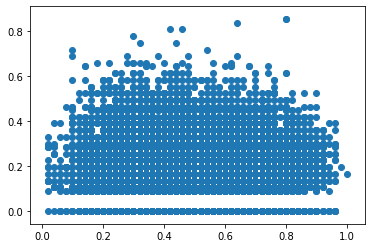

In [208]:
plt.scatter(m,n)
plt.show()

In [209]:
#detecting the outlier
outliers=[]           
def detect_outliers(n):
    threshold=3
    mean=np.mean(n)
    std=np.std(n)
    
    for i in n:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers         

In [210]:
outlier_pt=detect_outliers(n)

In [211]:
outlier_pt

[0.5821,
 0.5821,
 0.5821,
 0.5821,
 0.6567,
 0.6119,
 0.6119,
 0.6567,
 0.7761,
 0.6866,
 0.5821,
 0.5821,
 0.6567,
 0.5821,
 0.5821,
 0.6119,
 0.6567,
 0.7463,
 0.6418,
 0.6119,
 0.6119,
 0.8059999999999999,
 0.7463,
 0.6119,
 0.6119,
 0.6119,
 0.6119,
 0.5821,
 0.5821,
 0.6418,
 0.6119,
 0.5821,
 0.5821,
 0.5821,
 0.5821,
 0.5821,
 0.5821,
 0.6119,
 0.5821,
 0.8507,
 0.8507,
 0.6418,
 0.8358,
 0.6119,
 0.5821,
 0.6119,
 0.5821,
 0.5821,
 0.6418,
 0.6418,
 0.5821,
 0.6567,
 0.5821,
 0.6119,
 0.5821,
 0.5821,
 0.6567,
 0.6418,
 0.5821,
 0.6866,
 0.7164,
 0.6418,
 0.8059999999999999,
 0.5821,
 0.6866,
 0.6119,
 0.6567,
 0.5821,
 0.5821,
 0.6119,
 0.6567,
 0.5821,
 0.6418,
 0.6418,
 0.6866,
 0.6418,
 0.6567,
 0.6119,
 0.5821,
 0.5821,
 0.6866,
 0.6119,
 0.6418,
 0.7164,
 0.5821,
 0.5821,
 0.5821,
 0.5821,
 0.5821,
 0.6119,
 0.6119,
 0.5821,
 0.6418,
 0.6418,
 0.5821,
 0.5821,
 0.6418,
 0.6119,
 0.6119,
 0.5821,
 0.5821,
 0.6119,
 0.6567,
 0.5821,
 0.5821,
 0.5821,
 0.6567]

# END